In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import matplotlib

In [3]:
#seg = "/Users/amulya/Downloads/polr2f/OC-FOV_POLR2F_ENSG00000100142_CID000701_FID00028538_stack-1.tif_seg.npy"
#orig = "/Users/amulya/Downloads/OC-FOV_POLR2F_ENSG00000100142_CID000701_FID00028538_stack.tif.tiff"

seg = "/Users/amulya/Desktop/OC-FOV_POLR2J_ENSG00000005075_CID000705_FID00028555_stack.tif_seg.npy"
orig = "/Users/amulya/Desktop/OC-FOV_POLR2J_ENSG00000005075_CID000705_FID00028555_stack.tif.tiff"

In [4]:
cellpose_res = np.load(seg,allow_pickle=True)
cellpose_res.item().keys()
cellpose_res_dict = cellpose_res.item()
masks = cellpose_res_dict['masks']

In [5]:
img = Image.open(orig,mode='r',formats=["TIFF"])
c0 = []
c1 = []
for i in range(img.n_frames):
    img.seek(i)
    if i % 2 == 0:
        c0.append(np.array(img))
    else:
        c1.append(np.array(img))

In [6]:
c0 = np.array(c0)
c1 = np.array(c1)

In [8]:
# TODO - try taking masks of both channels and taking the union.
cell_labels = np.unique(masks)
corrs = []
for c in cell_labels:
    if c == 0:
        continue
    print(c)
    cell_corrs = []
    mask = np.where(np.array(masks)==c)
    bounds_0 = min(mask[0]), max(mask[0])
    bounds_1 = min(mask[1]), max(mask[1])
    bounds_2 = min(mask[2]), max(mask[2])
    cell_stack_mask = np.array(masks[:])
    cell_stack_mask[np.where(masks!=c)] = 0
    cell_stack_mask = cell_stack_mask[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
    cell_stack_c0 = c0[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
    cell_stack_c1 = c1[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
    c0_whole = []
    c1_whole = []
    for i in range(np.shape(cell_stack_c0)[0]):
        c0_slice = np.ravel(cell_stack_c0[i])
        c1_slice = np.ravel(cell_stack_c1[i])
        mask_slice = np.ravel(cell_stack_mask[i])
        mask_pixels = np.where(mask_slice!=0)[0]
        if len(mask_pixels) < 2:
            continue
        c0_whole = c0_whole + list(c0_slice)
        c1_whole = c1_whole + list(c1_slice)
        #r, p = scipy.stats.pearsonr(c0_slice[mask_pixels],c1_slice[mask_pixels]) 
        #cell_corrs.append(r)
    r, p = scipy.stats.pearsonr(c0_whole,c1_whole)
    corrs.append(r)

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

Text(0.5, 1.0, 'Flattened corrs')

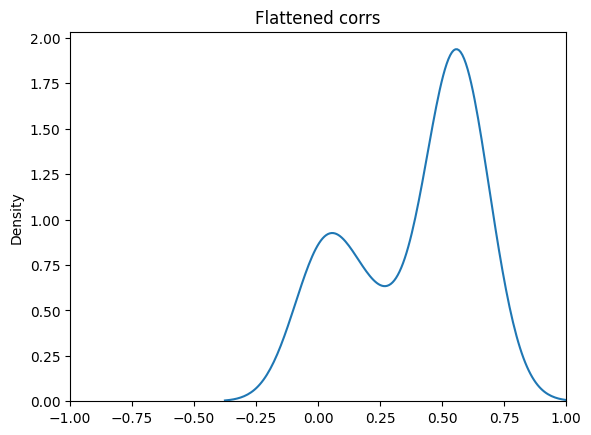

In [23]:
sns.kdeplot(corrs)
plt.xlim((-1,1))
plt.title("Flattened corrs")

In [ ]:
# show diffs for cells with max and min corrs
srted = np.argsort(corrs)
c = cell_labels[srted[9]]
mask = np.where(np.array(masks)==c)
bounds_0 = min(mask[0]), max(mask[0])
bounds_1 = min(mask[1]), max(mask[1])
bounds_2 = min(mask[2]), max(mask[2])
cell_stack_mask = np.array(masks[:])
cell_stack_mask[np.where(masks!=c)] = 0
# cell_stack_mask = cell_stack_mask[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
cell_stack_c0 = c0[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
cell_stack_c1 = c1[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
for i in range(np.shape(cell_stack_c0)[0]):
    cs1_norm = cell_stack_c1[i]/np.max(cell_stack_c1[i])
    cs0_norm = cell_stack_c0[i]/np.max(cell_stack_c0[i])
    plt.imshow(cs1_norm,cmap='gray')
    plt.show()
    plt.imshow(cs0_norm,cmap='gray')
    plt.show()
    plt.imshow(abs(cs1_norm-cs0_norm),cmap="gray", vmin=0, vmax=1)
    plt.colorbar()
    # plt.show()

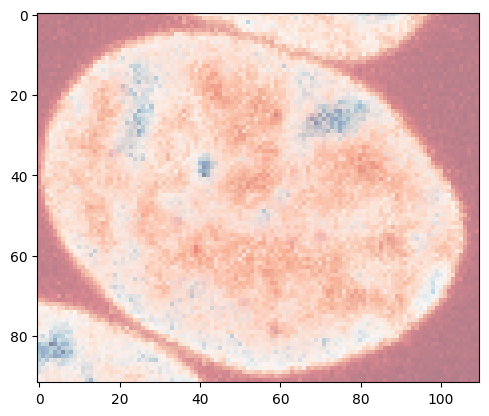

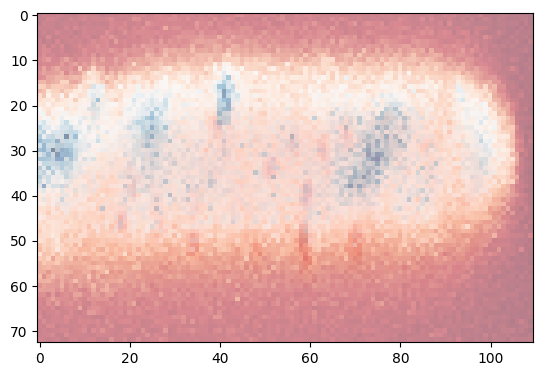

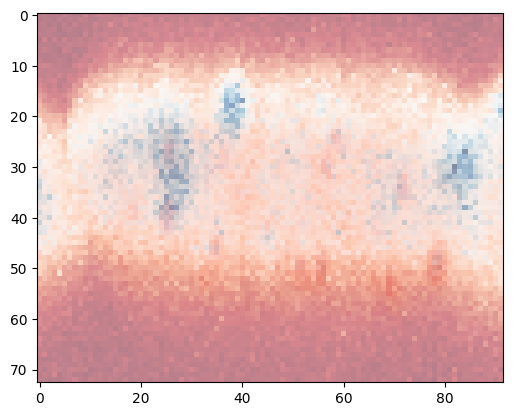

<Figure size 640x480 with 0 Axes>

In [28]:
# show diffs for cells with max and min corrs
import matplotlib
srted = np.argsort(corrs)
c = cell_labels[srted[-2]]
mask = np.where(np.array(masks)==c)
bounds_0 = min(mask[0]), max(mask[0])
bounds_1 = min(mask[1]), max(mask[1])
bounds_2 = min(mask[2]), max(mask[2])
cell_stack_mask = np.array(masks[:])
cell_stack_mask[np.where(masks!=c)] = 0
# cell_stack_mask = cell_stack_mask[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
cell_stack_c0 = c0[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
cell_stack_c1 = c1[bounds_0[0]:bounds_0[1],bounds_1[0]:bounds_1[1],bounds_2[0]:bounds_2[1]]
# xz -> axis 1
# yz -> axis 2
def mip_diff (ax):
    mip_c0 = np.max(cell_stack_c0, axis=ax)
    mip_c0_norm = mip_c0/np.max(mip_c0)
    mip_c1 = np.max(cell_stack_c1, axis=ax)
    mip_c1_norm = mip_c1/np.max(mip_c1)
    #plt.imshow(mip_c0-mip_c1, cmap= "seismic")
    plt.imshow(mip_c1,cmap='Reds', alpha=0.5)
    plt.imshow(mip_c0,cmap='RdBu', alpha=0.5)
    #plt.colorbar()
    plt.show()
    plt.clf()

mip_diff(ax=0)
mip_diff(ax=1)
mip_diff(ax=2)

In [32]:
len(cell_stack_c0)

62

In [33]:
np.shape(cell_stack_c0)

(62, 88, 102)